# Oscillation in eeg 

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp
import numpy as np 
import mne 
warnings.filterwarnings('ignore')

In [82]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

start = 4000
end = 6940
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)

def four_s_cutting(path = '../data/EEGArchi13mPFC.txt') : 
    df = pd.read_csv(path)
    df['time'] = df.index * time
    df.rename(columns={'0': 'mV'}, inplace=True)
    df = df.iloc[int(start*sampling_rate):int(end*sampling_rate)]
    res = []
    for i in range(0,len(df),1000) :
        try : 
            df_red = df.iloc[i:i+1000]
        except : 
            df_red = df.iloc[i:]

        res.append(df_red)
    return res

data_cut = four_s_cutting()
data = np.array([data_cut[i]["mV"] for i in range(len(data_cut))]) ## All the data
info = mne.create_info(ch_names=['eeg']*len(data),
                       ch_types=['eeg']*len(data),
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)

power = simulated_raw.compute_psd()
frequencies = np.arange(0, 120, 0.935)
htmap = pd.DataFrame(power[0])
htmap = htmap.T
for i in range(1,len(data)) : 
    htmap[i] = power[i][0]
htmap = htmap.rename(columns=dict((i,i*4) for i in range(len(data))))
htmap
htmap["freq"] = frequencies
htmap = htmap.set_index("freq", drop=True)

multiple_lists = [htmap.iloc[[0]].values.flatten().tolist(), htmap.iloc[[1]].values.flatten().tolist(), htmap.iloc[[2]].values.flatten().tolist(), htmap.iloc[[3]].values.flatten().tolist(), htmap.iloc[[4]].values.flatten().tolist(), htmap.iloc[[5]].values.flatten().tolist()]
arrays = [np.array(x) for x in multiple_lists]
List05 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(6, 14)]
arrays = [np.array(x) for x in multiple_lists]
List512 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(14, 34)]
arrays = [np.array(x) for x in multiple_lists]
List1230 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(34, 129)]
arrays = [np.array(x) for x in multiple_lists]
List30 = [np.mean(k) for k in zip(*arrays)]

samplePhase_after = [(4247.4, 4288.1), (4457.88, 4491.12), (4660.82, 4717.24), (4914.66, 4945.66), (5243.58, 5282.82), (5465.82, 5487.82), (5801.04, 5836.86), (6059.9, 6079.62), (6461.38, 6478.56), (6711.64, 6744.96)]
choicePhase_after = [(4385.42, 4407.76), (4523.34, 4644.14), (4813.8, 4837.26), (5013.44, 5125.9), (5326.42, 5444.2), (5531.28, 5709.04), (5869.82, 5976.2), (6103.62, 6302.44), (6531.32, 6640.8), (6801.36, 6943.74)]

df = pd.DataFrame([_+4247.4 for _ in htmap.columns.tolist()], columns=['time'])
df['µV'] = List05 

mean_sample_after_05 = []
for i in range(len(samplePhase_after)) : 
    tmp = df[(df['time'] >= samplePhase_after[i][0]) & (df['time'] <= samplePhase_after[i][1])]
    mean_sample_after_05.append(tmp['µV'].mean())

mean_choice_after_05 = []
for i in range(len(choicePhase_after)) :
    tmp = df[(df['time'] >= choicePhase_after[i][0]) & (df['time'] <= choicePhase_after[i][1])]
    mean_choice_after_05.append(tmp['µV'].mean())

df = pd.DataFrame([_+4247.4 for _ in htmap.columns.tolist()], columns=['time'])
df['µV'] = List512

mean_sample_after_512 = []
for i in range(len(samplePhase_after)) : 
    tmp = df[(df['time'] >= samplePhase_after[i][0]) & (df['time'] <= samplePhase_after[i][1])]
    mean_sample_after_512.append(tmp['µV'].mean())

mean_choice_after_512 = []
for i in range(len(choicePhase_after)) :
    tmp = df[(df['time'] >= choicePhase_after[i][0]) & (df['time'] <= choicePhase_after[i][1])]
    mean_choice_after_512.append(tmp['µV'].mean())

df = pd.DataFrame([_+4247.4 for _ in htmap.columns.tolist()], columns=['time'])
df['µV'] = List1230

mean_sample_after_1230 = []
for i in range(len(samplePhase_after)) : 
    tmp = df[(df['time'] >= samplePhase_after[i][0]) & (df['time'] <= samplePhase_after[i][1])]
    mean_sample_after_1230.append(tmp['µV'].mean())

mean_choice_after_1230 = []
for i in range(len(choicePhase_after)) :
    tmp = df[(df['time'] >= choicePhase_after[i][0]) & (df['time'] <= choicePhase_after[i][1])]
    mean_choice_after_1230.append(tmp['µV'].mean())

df = pd.DataFrame([_+4247.4 for _ in htmap.columns.tolist()], columns=['time'])
df['µV'] = List30 

mean_sample_after_30 = []
for i in range(len(samplePhase_after)) : 
    tmp = df[(df['time'] >= samplePhase_after[i][0]) & (df['time'] <= samplePhase_after[i][1])]
    mean_sample_after_30.append(tmp['µV'].mean())

mean_choice_after_30 = []
for i in range(len(choicePhase_after)) :
    tmp = df[(df['time'] >= choicePhase_after[i][0]) & (df['time'] <= choicePhase_after[i][1])]
    mean_choice_after_30.append(tmp['µV'].mean())

Creating RawArray with float64 data, n_channels=735, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Effective window size : 1.024 (s)


Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Effective window size : 1.024 (s)


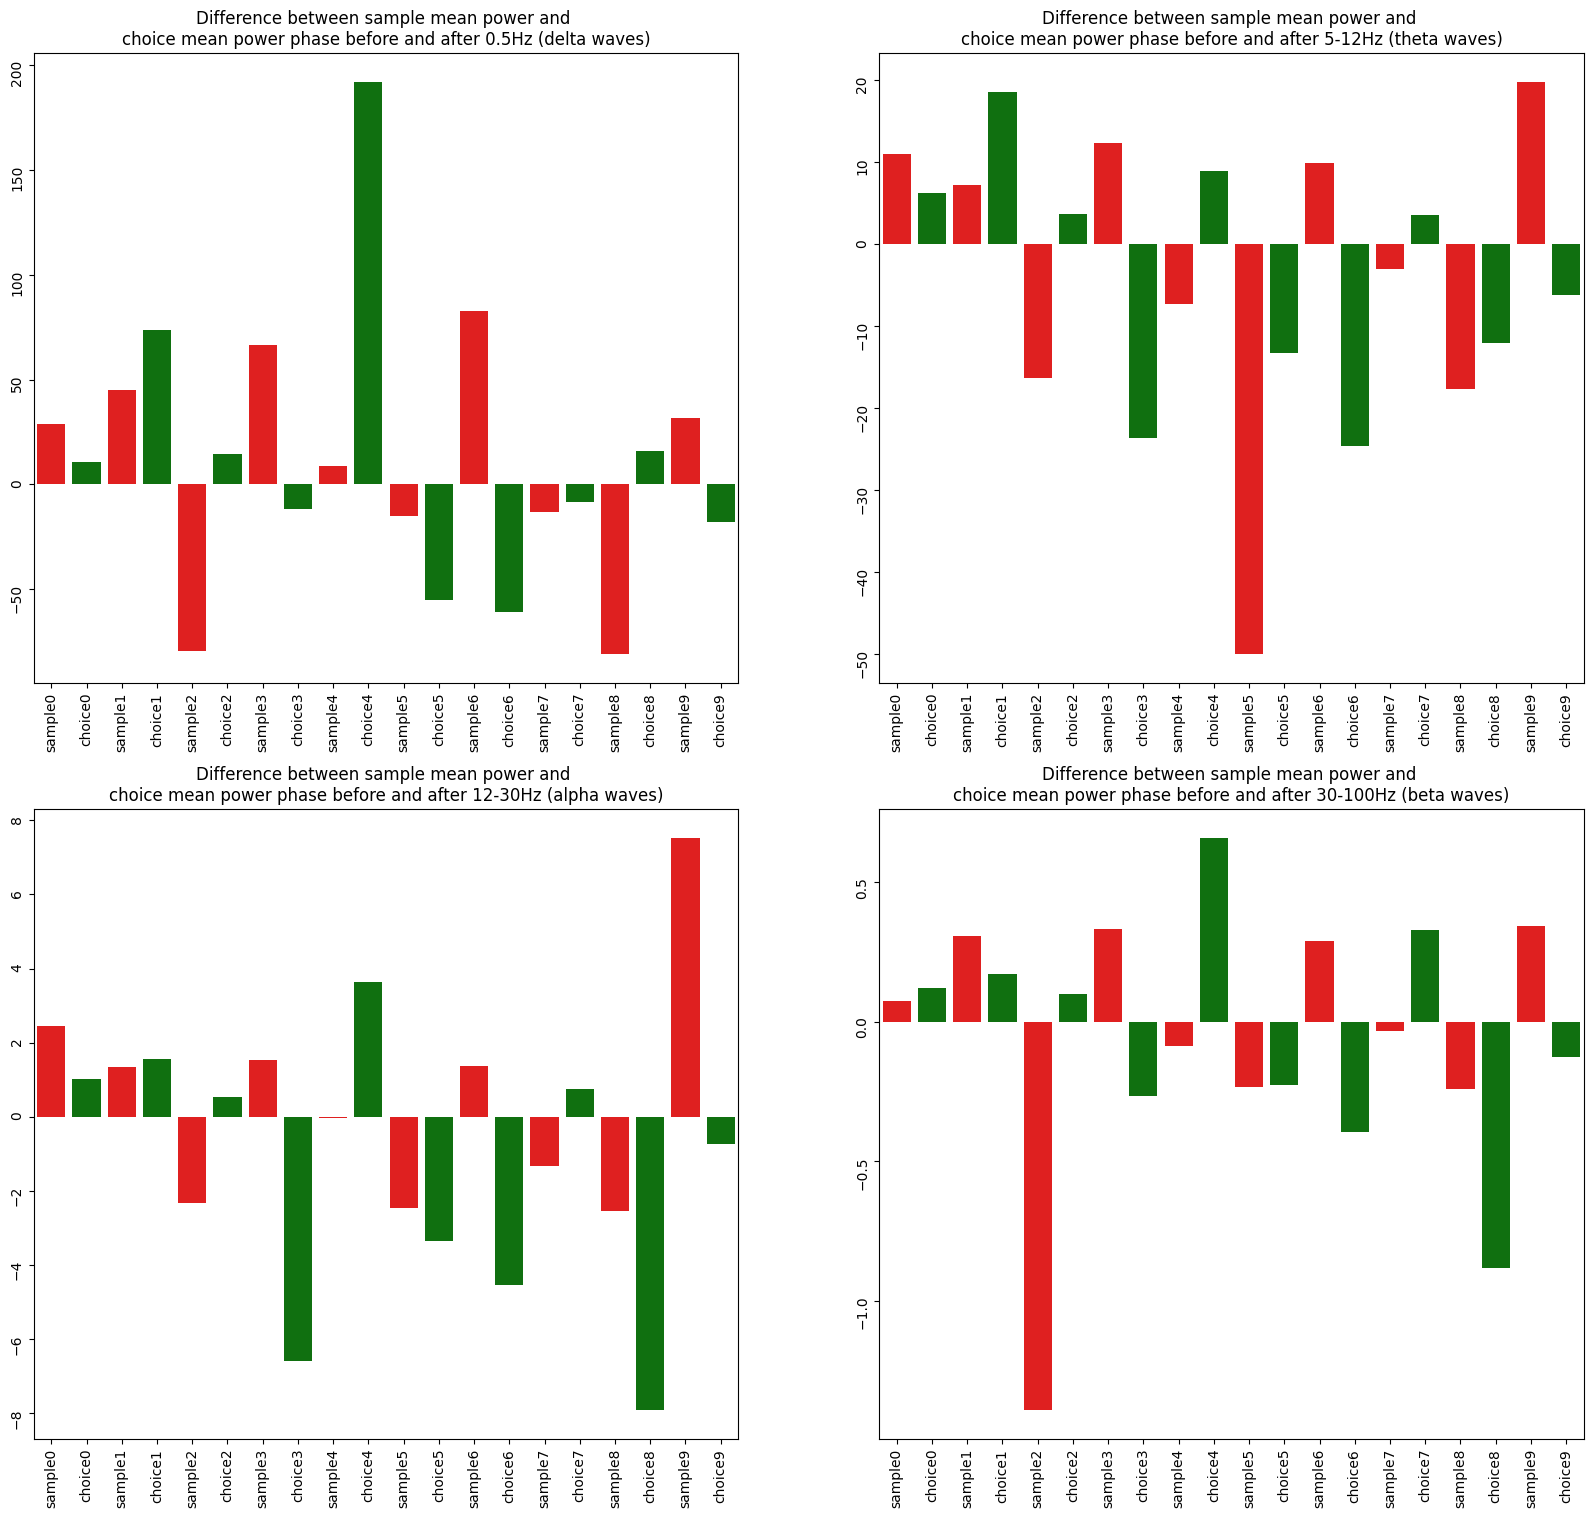

In [96]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

start = 0
end = 2500
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)

def four_s_cutting(path = '../data/EEGArchi13mPFC.txt') : 
    df = pd.read_csv(path)
    df['time'] = df.index * time
    df.rename(columns={'0': 'mV'}, inplace=True)
    df = df.iloc[int(start*sampling_rate):int(end*sampling_rate)]
    res = []
    for i in range(0,len(df),1000) :
        try : 
            df_red = df.iloc[i:i+1000]
        except : 
            df_red = df.iloc[i:]

        res.append(df_red)
    return res

data_cut = four_s_cutting()
data = np.array([data_cut[i]["mV"] for i in range(len(data_cut))]) ## All the data
info = mne.create_info(ch_names=['eeg']*len(data),
                       ch_types=['eeg']*len(data),
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)

power = simulated_raw.compute_psd()
frequencies = np.arange(0, 120, 0.935)
htmap = pd.DataFrame(power[0])
htmap = htmap.T
for i in range(1,len(data)) : 
    htmap[i] = power[i][0]
htmap = htmap.rename(columns=dict((i,i*4) for i in range(len(data))))
htmap["freq"] = frequencies
htmap = htmap.set_index("freq", drop=True)

multiple_lists = [htmap.iloc[[0]].values.flatten().tolist(), htmap.iloc[[1]].values.flatten().tolist(), htmap.iloc[[2]].values.flatten().tolist(), htmap.iloc[[3]].values.flatten().tolist(), htmap.iloc[[4]].values.flatten().tolist(), htmap.iloc[[5]].values.flatten().tolist()]
arrays = [np.array(x) for x in multiple_lists]
List05 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(6, 14)]
arrays = [np.array(x) for x in multiple_lists]
List512 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(14, 34)]
arrays = [np.array(x) for x in multiple_lists]
List1230 = [np.mean(k) for k in zip(*arrays)]

multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(34, 129)]
arrays = [np.array(x) for x in multiple_lists]
List30 = [np.mean(k) for k in zip(*arrays)]

samplePhase_before = [(0.02, 62.78), (199.78, 242.64), (382.94, 449.02), (629.5, 665.46), (859.06, 920.34), (1049.9, 1123.96), (1343.58, 1379.16), (1620.9, 1671.3), (1945.08, 1985.68), (2135.96, 2176.46)]
choicePhase_before = [(161.32, 179.6), (338.2, 358.0), (496.86, 614.74), (706.52, 832.84), (1018.4, 1028.72), (1193.28, 1330.66), (1478.86, 1519.26), (1776.84, 1818.26), (2086.1, 2115.04), (2214.0, 2358.0)]

df = pd.DataFrame(htmap.columns.tolist(), columns=['time'])
df['µV'] = List05 
mean_sample_before = []
for i in range(len(samplePhase_before)) : 
    tmp = df[(df['time'] >= samplePhase_before[i][0]) & (df['time'] <= samplePhase_before[i][1])]
    mean_sample_before.append(tmp['µV'].mean())

mean_choice_before = []
for i in range(len(choicePhase_before)) :
    tmp = df[(df['time'] >= choicePhase_before[i][0]) & (df['time'] <= choicePhase_before[i][1])]
    mean_choice_before.append(tmp['µV'].mean())


fig, ax = plt.subplots(2,2,figsize=(20, 18))
clr = ["red" if _%2==0 else "green" for _ in range(20)]
res = []
sample_choice = []
for i in range(len(mean_sample_before)) : 
    res.append(mean_sample_before[i]-mean_sample_after_05[i])
    res.append(mean_choice_before[i]-mean_choice_after_05[i])
    sample_choice.append(f"sample{i}")
    sample_choice.append(f"choice{i}")

sns.barplot(x = sample_choice, y = res, ax=ax[0,0], palette=clr)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title("Difference between sample mean power and \nchoice mean power phase before and after 0.5Hz (delta waves)")

df = pd.DataFrame(htmap.columns.tolist(), columns=['time'])
df['µV'] = List512
mean_sample_before = []
for i in range(len(samplePhase_before)) : 
    tmp = df[(df['time'] >= samplePhase_before[i][0]) & (df['time'] <= samplePhase_before[i][1])]
    mean_sample_before.append(tmp['µV'].mean())

mean_choice_before = []
for i in range(len(choicePhase_before)) :
    tmp = df[(df['time'] >= choicePhase_before[i][0]) & (df['time'] <= choicePhase_before[i][1])]
    mean_choice_before.append(tmp['µV'].mean())

res = []
sample_choice = []
for i in range(len(mean_sample_before)) : 
    res.append(mean_sample_before[i]-mean_sample_after_512[i])
    res.append(mean_choice_before[i]-mean_choice_after_512[i])
    sample_choice.append(f"sample{i}")
    sample_choice.append(f"choice{i}")

sns.barplot(x = sample_choice, y = res, ax=ax[0,1], palette=clr)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title("Difference between sample mean power and \nchoice mean power phase before and after 5-12Hz (theta waves)")

df = pd.DataFrame(htmap.columns.tolist(), columns=['time'])
df['µV'] = List1230
mean_sample_before = []
for i in range(len(samplePhase_before)) : 
    tmp = df[(df['time'] >= samplePhase_before[i][0]) & (df['time'] <= samplePhase_before[i][1])]
    mean_sample_before.append(tmp['µV'].mean())

mean_choice_before = []
for i in range(len(choicePhase_before)) :
    tmp = df[(df['time'] >= choicePhase_before[i][0]) & (df['time'] <= choicePhase_before[i][1])]
    mean_choice_before.append(tmp['µV'].mean())

res = []
sample_choice = []
for i in range(len(mean_sample_before)) : 
    res.append(mean_sample_before[i]-mean_sample_after_1230[i])
    res.append(mean_choice_before[i]-mean_choice_after_1230[i])
    sample_choice.append(f"sample{i}")
    sample_choice.append(f"choice{i}")

sns.barplot(x = sample_choice, y = res, ax=ax[1,0], palette=clr)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title("Difference between sample mean power and \nchoice mean power phase before and after 12-30Hz (alpha waves)")

df = pd.DataFrame(htmap.columns.tolist(), columns=['time'])
df['µV'] = List30
mean_sample_before = []
for i in range(len(samplePhase_before)) : 
    tmp = df[(df['time'] >= samplePhase_before[i][0]) & (df['time'] <= samplePhase_before[i][1])]
    mean_sample_before.append(tmp['µV'].mean())

mean_choice_before = []
for i in range(len(choicePhase_before)) :
    tmp = df[(df['time'] >= choicePhase_before[i][0]) & (df['time'] <= choicePhase_before[i][1])]
    mean_choice_before.append(tmp['µV'].mean())

res = []
sample_choice = []
for i in range(len(mean_sample_before)) : 
    res.append(mean_sample_before[i]-mean_sample_after_30[i])
    res.append(mean_choice_before[i]-mean_choice_after_30[i])
    sample_choice.append(f"sample{i}")
    sample_choice.append(f"choice{i}")

sns.barplot(x = sample_choice, y = res, ax=ax[1,1], palette=clr)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title("Difference between sample mean power and \nchoice mean power phase before and after 30-100Hz (beta waves)")

plt.savefig("old_work/figures/3_diffrence_mean_power.png", dpi = 500)
plt.show()